In [1]:
from graphviz import Digraph
from collections import deque
#Dibujar el arbol recursivamente
def dibujar_arbol(node, dot=None):
    #Se ejecuta la primera vez
    if dot is None:
        #Crea el arbol
        dot = Digraph()
        #Agrega el nodo raíz
        dot.node(str(node),
                 f'{node.fileName}, {node.imageType}, {node.size}')
    #Agrega el subarbol izquierda
    if node.leftSon is not None:
      #Agrega el nodo hijo izquierdo
      dot.node(str(node.leftSon),
               f'{node.leftSon.fileName}, {node.leftSon.imageType}, {node.leftSon.size}')
      #Agrega la arista con el nodo izquierdo
      dot.edge(str(node), str(node.leftSon))
      #Llamado recursivo subarbol izquierdo
      dibujar_arbol(node.leftSon, dot)
    #Agrega el subarbol derecho
    if node.rightSon is not None:
      #Agrega el nodo hijo derecho
      dot.node(str(node.rightSon),
               f'{node.rightSon.fileName}, {node.rightSon.imageType}, {node.rightSon.size}')
      #Agrega la arista con el nodo derecho
      dot.edge(str(node), str(node.rightSon))
      #Llamado recursivo subarbol derecho
      dibujar_arbol(node.rightSon, dot)

    return dot

#Guardar imagen del arbol
def guardar_arbol(dot):
  dot.render('arbol', format='png', cleanup=True)

In [2]:
#Clase nodo
class Node():
  def __init__(self, fileName, imageType, sizeI ):
    self.fileName = fileName
    self.imageType = imageType
    self.size = sizeI
    self.leftSon = None
    self.rightSon = None
    self.equi = 0

In [3]:
#Obtener el nivel del nodo
def nivelV(Arbol, nodo, nivelA = -1):
  if Arbol is None:
    return None
  #Busca el nivel en el subarbol izquierdo
  if nodo.fileName < Arbol.fileName:
    return nivelV(Arbol.leftSon, nodo, 1 + nivelA)
  #Busca nivel subarbol derecho
  elif nodo.fileName > Arbol.fileName:
    return nivelV(Arbol.rightSon, nodo, 1 + nivelA)
  else:
    return 1 + nivelA

In [4]:
#Obtiene la profundidad del subarbol (Para el F.E.)
def altura(nodo):
    if nodo is None:
        return 0
    return 1 + max(altura(nodo.leftSon), altura(nodo.rightSon))

In [5]:
#Rotación simple derecha
def rot_right(node):
    newNode = node.leftSon
    node.leftSon = newNode.rightSon
    newNode.rightSon = node
    return newNode

#Rotación simple izquierda
def rot_left(node):
    newNode = node.rightSon
    node.rightSon = newNode.leftSon
    newNode.leftSon = node
    return newNode

In [6]:
#Insertar un nodo
def insert(arbol, node):
  #Si el subarbol está vacío se agrega el nodo
  if arbol is None:
    return node

  #recursivamente se agrega a la izquierda o derecha
  if node.fileName < arbol.fileName:
    arbol.leftSon = insert(arbol.leftSon, node)
  elif node.fileName > arbol.fileName :
    arbol.rightSon = insert(arbol.rightSon, node)
  else:
    #Si encuentra no hace nada
    print("Already added!")
    return arbol

  arbol.equi = altura(arbol.leftSon) - altura(arbol.rightSon)

  # +2 y el nodo menor a hijo izquirdo
  if arbol.equi > 1 and node.fileName < arbol.leftSon.fileName:
    return rot_right(arbol)
  # -2 y el nodo mayor al hijo de la dercha
  elif arbol.equi < -1 and node.fileName > arbol.rightSon.fileName:
    return rot_left(arbol)
  # +2 y nodo es mayor que el hijo de la izquierda
  elif arbol.equi > 1 and node.fileName > arbol.leftSon.fileName:
    #Rotación doble izquierda-derecha
    arbol.leftSon = rot_left(arbol.leftSon)
    return rot_right(arbol)
  # -2 y nodo es menor que el hijo de la derecha
  elif arbol.equi < -1 and node.fileName < arbol.rightSon.fileName:
    #Rotación doble izquierda-derecha
    arbol.rightSon = rot_right(arbol.rightSon)
    return rot_left(arbol)

  return arbol

In [7]:
#Hallar el menor valor de un subarbol
def minValue(Arbol):
  min = Arbol
  #Irse a la izquierda las veces que se puedan
  while min.leftSon is not None:
    min = min.leftSon
  return min

In [8]:
#Obtener factor equilibrio
def equili(Arbol):
  return altura(Arbol.leftSon) - altura(Arbol.rightSon)

In [9]:
#Eliminar un nodo recursivo
def delete(Arbol, filename):
  #Si el abrol es nulo no hace nada
  if Arbol is None:
    return Arbol
  #elimina en el subarbol izquierdo si es menor
  if filename < Arbol.fileName:
    Arbol.leftSon = delete(Arbol.leftSon, filename)
  #elimina en el subarbol izquierdo si es mayor
  elif filename > Arbol.fileName:
    Arbol.rightSon = delete(Arbol.rightSon, filename)
  else:
    #Si el nodo tiene a lo más un hijo, se eleva ese hijo
    if Arbol.leftSon is None:
      temp = Arbol.rightSon
      Arbol = None
      return temp
    elif Arbol.rightSon is None:
      temp = Arbol.leftSon
      Arbol = None
      return temp

    #Si el nodo tiene dos hijos
    #Buscar el mínimo derecho
    temp = minValue(Arbol.rightSon)
    #Guardas en el nodo a eliminar los valores del nodo mínimo
    Arbol.fileName = temp.fileName
    Arbol.imageType = temp.imageType
    Arbol.size = temp.size

    #Borrar el mínimo del subarbol derecho
    Arbol.rightSon = delete(Arbol.rightSon, temp.fileName)

  #if Arbol is None:
    #return Arbol
  #Se hallan las profundidades de los subarboles
  l = altura(Arbol.leftSon)
  d = altura(Arbol.rightSon)
  #Se calcula el F.E
  Arbol.equi = l-d
  # +2 e hijo izquierdo >=0
  if Arbol.equi > 1 and equili(Arbol.leftSon) >= 0:
    return rot_right(Arbol)
  #-2 e hijo derecho <=0
  elif Arbol.equi < -1 and equili(Arbol.rightSon) <= 0:
    return rot_left(Arbol)
  #+2 e hijo izquierdo -1
  elif Arbol.equi > 1 and equili(Arbol.leftSon) < 0:
    #rotación doble izq-der
    Arbol.leftSon = rot_left(Arbol.leftSon)
    return rot_right(Arbol)
  #-2 e hijo derecho +1
  elif Arbol.equi < -1 and equili(Arbol.rightSon) > 0:
    #rotación doble der-izq
    Arbol.rightSon = rot_right(Arbol.rightSon)
    return rot_left(Arbol)

  return Arbol

In [10]:
#Hallar el padre de un nodo
def padreN(Arbol, node, padre = None):
  if Arbol is None:
    return None
  #Se busca en los subarboles y se pasa pasa como parámetro el nodo
  if node.fileName < Arbol.fileName:
    return padreN(Arbol.leftSon, node, Arbol)
  elif node.fileName > Arbol.fileName:
    return padreN(Arbol.rightSon, node, Arbol)
  else:
    #si es igual, devuelve el nodo padre
    return padre

In [11]:
#Buscar abuelo
#raiz nodo actula y node nodo a buscar
def encontrar_abuelo(raiz, node, padre=None, abuelo=None):
    if raiz is None:
        return None
    #Si se encuentra
    if raiz.fileName == node.fileName:
        #Si tiene abuelo
        if abuelo:
            return abuelo
        else:
            print('No tiene abuelo')
            return
    #Buscar el abuelo en los subarboles
    #se pasa como padre el nodo actual y como abuelo el padre del actual
    abuelo_izquierdo = encontrar_abuelo(raiz.leftSon, node, raiz, padre)
    abuelo_derecho = encontrar_abuelo(raiz.rightSon, node, raiz, padre)


    if abuelo_izquierdo:
        return abuelo_izquierdo
    elif abuelo_derecho:
        return abuelo_derecho
    else:
        return None

In [12]:
#Buscar el tío
def tio(Arbol, node):
  #Buscar el abuelo
  ab = encontrar_abuelo(Arbol, node)
  #si encuentra el abuelo
  if ab:
    #
    if node == ab.leftSon.leftSon or node == ab.leftSon.rightSon:
      return ab.rightSon
    else:
      return ab.leftSon
  else:
    return

In [13]:
#Busqueda
def search(Arbol, filename):
  if Arbol is None:
    return None
  #Si es menor lo busca en el subarbol izq
  if filename < Arbol.fileName:
    return search(Arbol.leftSon, filename)
  #Si es mayor lo busca en el subarbol der
  elif filename > Arbol.fileName:
    return search(Arbol.rightSon, filename)
  #Si es igual lo retorna
  else:
    return Arbol

In [14]:
#Busqueda con condiciones
def search_p(Arbol, typeI, mini, maxi):
  datas = []
  if Arbol is None:
    return datas
  #Si cumple la condición se agrega a la lista
  if Arbol.imageType == typeI and mini <= Arbol.size <= maxi:
    datas.append(Arbol)
  #Recursivamente se retorna la lista actual con las listas de los subarboles
  return datas + search_p(Arbol.leftSon, typeI, mini, maxi) + search_p(Arbol.rightSon, typeI, mini, maxi)

In [15]:
#Imprimir por nivel
def print_level(Arbol, cola = None, sw = 1):
    if Arbol is None:
      return
    #Solo se ejecute en el primer llamado
    if sw == 1:
      colaN = deque()
      colaN.append(Arbol)
      print_level(Arbol, colaN, 0)

    if not cola:
        return
    #Cuando hay algo en la cola se imprime
    nodo_actual = cola.popleft()
    print(nodo_actual.fileName)
    #Se aregando los hijos a la cola si los tiene
    if nodo_actual.leftSon:
        cola.append(nodo_actual.leftSon)
    if nodo_actual.rightSon:
        cola.append(nodo_actual.rightSon)
    #llamado recursivo
    print_level(Arbol, cola, 0)

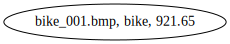

In [16]:
#Nodo raíz
Arbol = None

#Se crea un nodo nodo
node1 = Node('bike_001.bmp', 'bike', 921.65)
#Se inserta en el arbol
Arbol = insert(Arbol, node1)
#Se dibuja
a = dibujar_arbol(Arbol)
dibujar_arbol(Arbol)

In [17]:
guardar_arbol(a)

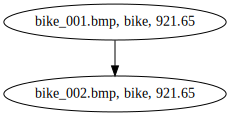

In [18]:
#Se inserta otro nodo
node = Node('bike_002.bmp', 'bike', 921.65)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

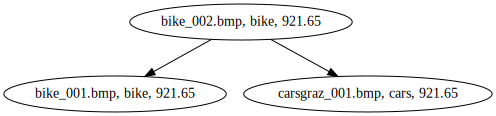

In [19]:
node = Node('carsgraz_001.bmp', 'cars', 921.65)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

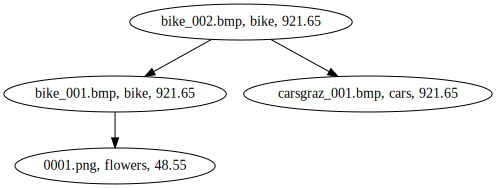

In [20]:
node = Node('0001.png', 'flowers', 48.55)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

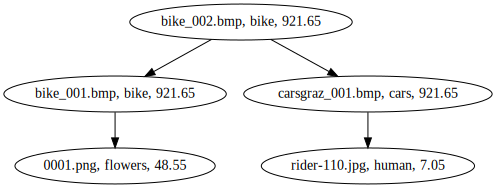

In [21]:
node = Node('rider-110.jpg', 'human', 7.05)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

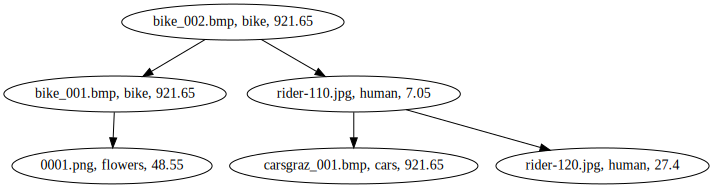

In [22]:
node = Node('rider-120.jpg', 'human', 27.4)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

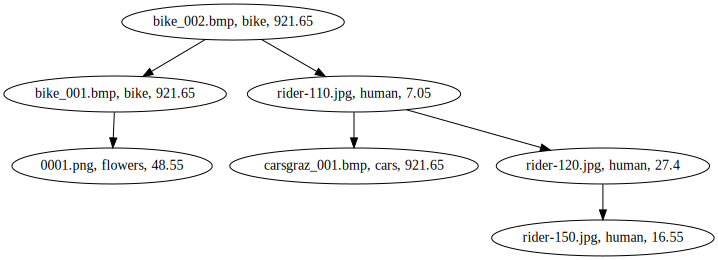

In [23]:
node = Node('rider-150.jpg', 'human', 16.55)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

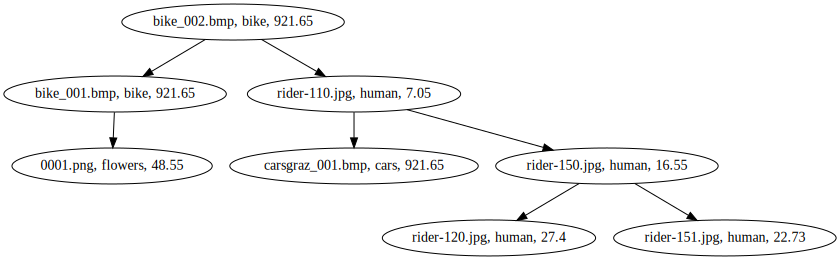

In [24]:
node = Node('rider-151.jpg', 'human', 22.73)
Arbol = insert(Arbol, node)
dibujar_arbol(Arbol)

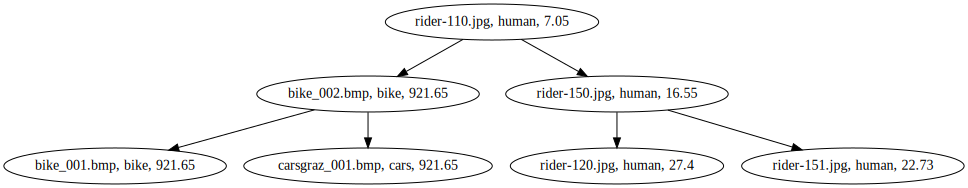

In [25]:
#Eliminar nodo
Arbol = delete(Arbol, '0001.png')
dibujar_arbol(Arbol)

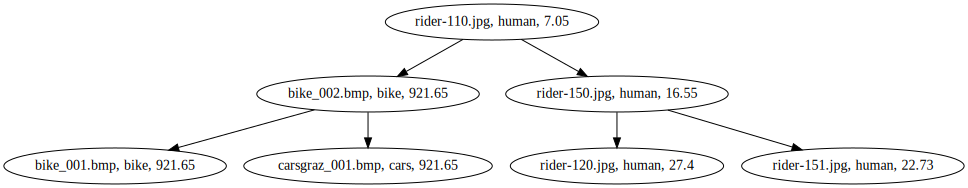

In [26]:
dibujar_arbol(Arbol)

In [27]:
#Buscar nodo
nodo = search(Arbol, 'rider-120.jpg')
nodo.size

27.4

In [28]:
#Nodos con una condición
res = search_p(Arbol, 'human', 15, 25)
for i in res:
  print(i.fileName)

rider-150.jpg
rider-151.jpg


In [29]:
#Recorrido por nivel
print_level(Arbol)

rider-110.jpg
bike_002.bmp
rider-150.jpg
bike_001.bmp
carsgraz_001.bmp
rider-120.jpg
rider-151.jpg


In [30]:
#Nivel del nodo
nivelV(Arbol, res[1])

2

In [31]:
#Factor balanceo
equili(Arbol.leftSon)

0

In [32]:
#Padre del nodo
padreN(Arbol, res[1]).fileName

'rider-150.jpg'

In [33]:
#Encontrar abuelo
encontrar_abuelo(Arbol, res[0])

No tiene abuelo


In [35]:
encontrar_abuelo(Arbol, res[1]).fileName

'rider-110.jpg'

In [34]:
#Encontrar tío
tio(Arbol, res[0])

No tiene abuelo


In [36]:
tio(Arbol, res[1]).fileName

'bike_002.bmp'